In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import math
import yfinance as yf
from datetime import datetime, timedelta

In [2]:
date_today = (datetime.today() - timedelta(days=100)).strftime('%Y-%m-%d')
#date_today = '2020-05-05'

In [3]:
date_previous = (datetime.today() - timedelta(days=184)).strftime('%Y-%m-%d')
#date_previous = '2020-01-01'

In [4]:
print(date_previous)
print(date_today)

2020-07-08
2020-09-30


In [5]:
new = yf.download(tickers ='EURUSD=X',start =date_previous,end =date_today,interval= '1d' )
print(new)
print(new.shape)

[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2020-07-07  1.131030  1.133658  1.126037  1.131286   1.131286       0
2020-07-08  1.127281  1.134559  1.126519  1.127523   1.127523       0
2020-07-09  1.133787  1.137268  1.128796  1.133915   1.133915       0
2020-07-10  1.128923  1.132477  1.125720  1.128796   1.128796       0
2020-07-13  1.130876  1.137048  1.130454  1.131004   1.131004       0
...              ...       ...       ...       ...        ...     ...
2020-09-23  1.170755  1.172001  1.166494  1.170837   1.170837       0
2020-09-24  1.166194  1.168100  1.162966  1.165854   1.165854       0
2020-09-25  1.167365  1.168511  1.161346  1.167324   1.167324       0
2020-09-28  1.163508  1.167965  1.161669  1.163535   1.163535       0
2020-09-29  1.167774  1.174164  1.166657  1.167883   1.167883       0

[61 rows x 6 columns

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

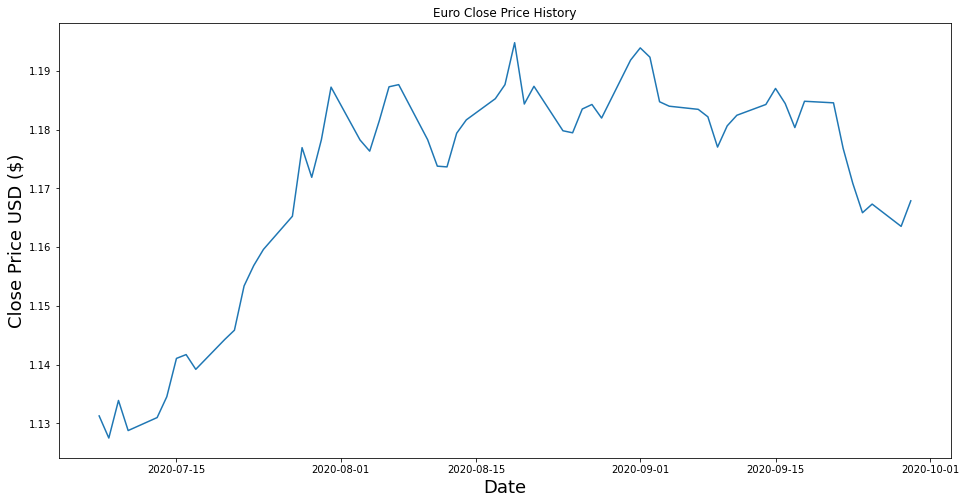

In [7]:
new = new.filter(['Close'])
new_dataset = new.values

plt.figure(figsize=(16,8))
plt.title('Euro Close Price History')
plt.plot(new['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [8]:
from tensorflow import keras
model = keras.models.load_model('lstm_model.h5')

In [9]:
test = []
for i in range(60,len(new_dataset)):
  test.append(new_dataset[i-60:i,0])

temp_input=list(test)
temp_input=temp_input[0].tolist()

test = np.array(test)
test = np.reshape(test, (test.shape[0],test.shape[1],1))
print(test.shape)
print(temp_input)


pred = model.predict(test, verbose=0)
print(pred)

(1, 60, 1)
[1.1312856674194336, 1.1275228261947632, 1.1339154243469238, 1.1287955045700073, 1.1310042142868042, 1.134549617767334, 1.1410704851150513, 1.1417193412780762, 1.139211654663086, 1.1442956924438477, 1.1458691358566284, 1.15340256690979, 1.1568717956542969, 1.1596084833145142, 1.1652567386627197, 1.1769275665283203, 1.171879529953003, 1.1782865524291992, 1.1872254610061646, 1.1782310009002686, 1.1763322353363037, 1.181544303894043, 1.187281847000122, 1.1876484155654907, 1.1782727241516113, 1.1737778186798096, 1.1736538410186768, 1.179380178451538, 1.1816558837890625, 1.1852554082870483, 1.1876484155654907, 1.1947859525680542, 1.1843500137329102, 1.1873664855957031, 1.1798018217086792, 1.1794538497924805, 1.183501958847046, 1.1842728853225708, 1.1819632053375244, 1.1918240785598755, 1.193901538848877, 1.1923214197158813, 1.184735894203186, 1.1839784383773804, 1.183445930480957, 1.1821727752685547, 1.177024483680725, 1.1806375980377197, 1.1824384927749634, 1.1842728853225708, 1

In [11]:
# demonstrate prediction for next 10 days
from numpy import array
lst_output=[]
n_steps=60
i=0
predictions=list()

while(i<10):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        test=np.array(temp_input[1:])
        print("{} day input {}".format(i,test))
        test=test.reshape(1,-1)
        test = test.reshape((1, n_steps, 1))
        #print(test)
        yhat = model.predict(test, verbose=0)
        print("{} day output {}".format(i,yhat))
        predictions.append(yhat[0][0])
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        test = test.reshape((1, n_steps,1))
        yhat = model.predict(test, verbose=0)
        print(yhat)
        predictions.append(yhat[0][0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[1.1066399]]
61
1 day input [1.12752283 1.13391542 1.1287955  1.13100421 1.13454962 1.14107049
 1.14171934 1.13921165 1.14429569 1.14586914 1.15340257 1.1568718
 1.15960848 1.16525674 1.17692757 1.17187953 1.17828655 1.18722546
 1.178231   1.17633224 1.1815443  1.18728185 1.18764842 1.17827272
 1.17377782 1.17365384 1.17938018 1.18165588 1.18525541 1.18764842
 1.19478595 1.18435001 1.18736649 1.17980182 1.17945385 1.18350196
 1.18427289 1.18196321 1.19182408 1.19390154 1.19232142 1.18473589
 1.18397844 1.18344593 1.18217278 1.17702448 1.1806376  1.18243849
 1.18427289 1.18700004 1.18444121 1.18034494 1.18482006 1.18455338
 1.17680001 1.17083681 1.16585445 1.1673243  1.16353488 1.10663986]
1 day output [[1.103841]]
2 day input [1.13391542 1.1287955  1.13100421 1.13454962 1.14107049 1.14171934
 1.13921165 1.14429569 1.14586914 1.15340257 1.1568718  1.15960848
 1.16525674 1.17692757 1.17187953 1.17828655 1.18722546 1.178231
 1.17633224 1.1815443  1.18728185 1.18764842 1.17827272 1.173777

In [ ]:

fjut

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title('Euro Close Price History')
plt.plot(fjut)

plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()